In [3]:
%load_ext autoreload
%autoreload 2


In [4]:
from dataset import *
from utils import transform_to_float
import matplotlib.pyplot as plt

Getting Stock data from alphavantage

In [ ]:

start_date = '2020-01-01'
end_date = '2024-01-01'
stock_symbol = 'AAPL'

data = get_data_alpha_vantage(stock_symbol, start_date, end_date)

data.to_csv(f'Data/{stock_symbol}/data_{stock_symbol}_{start_date}.csv')


Merging 2 year datas from alphavantage

In [ ]:
stock_symbol = 'AAPL'
concatenated_df = merge_data_alpha_vantage("Data", stock_symbol)
concatenated_df.to_csv(f'Data/{stock_symbol}/{stock_symbol}_data_alphavantage.csv')

Get data from Twelvedata

In [ ]:
import requests
import pandas as pd
from datetime import datetime, timedelta
import time
start_date = datetime(2020, 2, 1)
end_date = datetime(2024, 1, 1)
stock_symbol = 'AAPL'

data = get_data_twelve_data(stock_symbol, start_date, end_date)
data.to_csv(f'Data/{stock_symbol}/{stock_symbol}_data_twelvedata.csv')

Compare data from alphavantage and twelvedata

In [ ]:
stock_symbol = 'AAPL'
alpha_df = pd.read_csv(f'Data/{stock_symbol}/{stock_symbol}_data_alphavantage.csv', index_col=0)
alpha_df.index = pd.to_datetime(alpha_df.index)
alpha_df = alpha_df.rename(columns={'1. open': 'open', '2. high': 'high', '3. low': 'low', '4. close': 'close', '5. volume': 'volume'})

In [ ]:
twelve_df = pd.read_csv(f'Data/{stock_symbol}/{stock_symbol}_data_twelvedata.csv', index_col=0)
twelve_df.index = pd.to_datetime(twelve_df.index)

In [ ]:
transform_to_float(alpha_df)
transform_to_float(twelve_df)

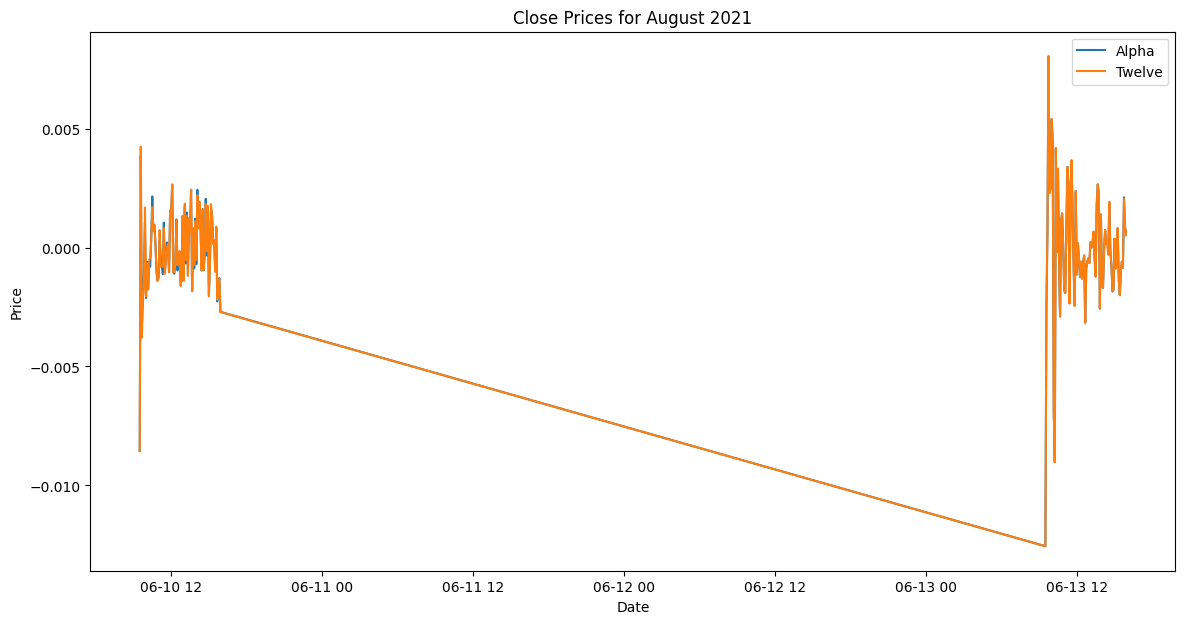

In [10]:

# Choose a common month
# year = 2020
# month = 10
# 
# # Filter both dataframes for the chosen month
# alpha_df_month = alpha_df[(alpha_df.index.year == year) & (alpha_df.index.month == month)]
# twelve_df_month = twelve_df[(twelve_df.index.year == year) & (twelve_df.index.month == month)]

# Find mutual indexes
mutual_indexes = alpha_df.index.intersection(twelve_df.index)
# print(mutual_indexes)

# Select rows with mutual indexes from both dataframes
alpha_df_mutual = alpha_df.loc[mutual_indexes]
twelve_df_mutual = twelve_df.loc[mutual_indexes]

# Plot the 'close' column from both dataframes
plt.figure(figsize=(14,7))
plt.plot(alpha_df_mutual['close'].pct_change().loc['2022-06-05': '2022-06-10'], label='Alpha')
plt.plot(twelve_df_mutual['close'].pct_change().loc['2022-06-05': '2022-06-10'], label='Twelve')
plt.title('Close Prices for August 2021')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

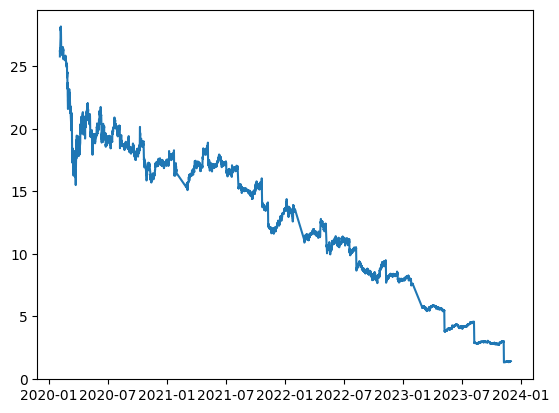

In [11]:
plt.plot(-alpha_df_mutual['close'] + twelve_df_mutual['close'])

In [12]:
diff = alpha_df_mutual['close'].pct_change() - twelve_df_mutual['close'].pct_change()
diff[diff > 0.01]

2020-05-07 09:30:00    0.013761
2020-08-07 09:30:00    0.012909
2020-11-09 09:30:00    0.015399
2021-03-01 09:30:00    0.013392
2021-05-07 09:30:00    0.010778
2021-08-09 09:30:00    0.011174
2021-11-09 09:30:00    0.013116
2022-03-01 09:30:00    0.011316
2022-05-09 09:30:00    0.011877
2022-08-09 09:30:00    0.012268
2022-11-09 09:30:00    0.011816
2023-03-01 09:30:00    0.011669
2023-05-09 09:30:00    0.013346
2023-08-09 09:30:00    0.011404
2023-11-09 09:30:00    0.011280
Name: close, dtype: float64